In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('/Users/jaski/Downloads/regression1.csv', encoding = 'unicode_escape')

In [2]:
data_df.head()

,ï»¿AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data_df.rename(columns = {'ï»¿AT':'AT'}, inplace = True)

In [5]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [7]:
# Define x and y 

x = data_df.drop(["PE"], axis = 1).values
y = data_df['PE'].values

In [8]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [9]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [10]:
# Split the data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [12]:
# Train the model on the training set

from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [14]:
ml.predict([[14.96, 41.76, 1024.07 , 73.17]])

array([467.34820092])

In [15]:
# evaluate the model

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9304112159477682

Text(0.5, 1.0, 'Actual vs Predicted')

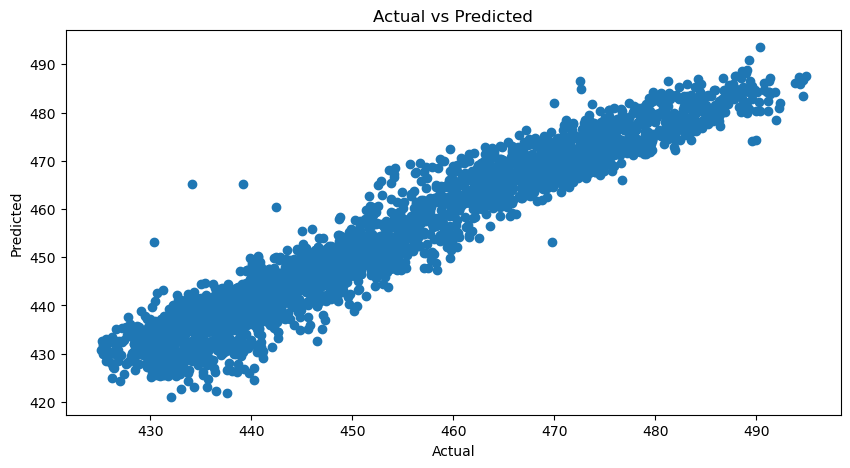

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [18]:
# Predicted Values

pred_y_df = pd.DataFrame({"Actual value" : y_test, "Predicted value" : y_pred, "Difference" : y_test - y_pred })

In [19]:
pred_y_df.head()

,Actual value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
